# Задание 4

Необходимые библиотеки

In [65]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline 

from scipy.stats import gaussian_kde


##### Начальные значения:
```
    A - размер зоны
    q - lambda для распределения пуассона
    cir_r - радиус круга 
    dist - расстояние между объектами
```   

In [155]:
A = 10
q = 0.3
cir_r = 0.5
dist = 3

Отрисовка 1 круга 

In [156]:
def plot_circle(x,y,r):
    angels = np.linspace(0,2*np.pi,50)
    cirX = x+r*np.cos(angels)
    cirY = y+r*np.sin(angels)
    plt.plot(cirX, cirY, "r")

Пуассоновское распределение

In [157]:
def poisson_points(l, area):
    num_block =  np.random.poisson(l*area**2)
    x = np.random.uniform(0,area, size=num_block)
    y = np.random.uniform(0,area, size=num_block)
    return x,y

Создание прямоугольника вокруг линии 

In [145]:
def create_rect(x1,y1,x2,y2,angl):
    diff_angl = 2*np.pi - angl
    reverse_angl = np.pi/2 - diff_angl
    opp_angl = reverse_angl + np.pi
    xA = x1 + cir_r * np.cos(opp_angl)
    yA = y1 + cir_r * np.sin(opp_angl)
    xB = x1 + cir_r * np.cos(reverse_angl)
    yB = y1 + cir_r * np.sin(reverse_angl)
    xC = x2 + cir_r * np.cos(reverse_angl)
    yC = y2 + cir_r * np.sin(reverse_angl)
    xD = x2 + cir_r * np.cos(opp_angl)
    yD = y2 + cir_r * np.sin(opp_angl)
    
    return xA, yA, xB, yB, xC, yC, xD, yD

Проверка расстояния

In [146]:
def check_dist(a,b,c):
    ca = (c-a) / norm(c-a)
    ba = (b-a) / norm(b-a)
    cb = (c-b) / norm(c-b)
    ab = (a-b) / norm(a-b)
    
    if np.arccos(np.dot(ca,ba)) > 1:
        return norm(c-a)
    if np.arccos(np.dot(cb,ab)) > 1:
        return norm(c-b)
    return norm(np.cross(a-b, a-c)) / norm(b-a)

Проверка на пересечение

In [147]:
def iscrossing():
    for i in range(len(x)):
        if np.round(check_dist(np.array([x1,y1]),np.array([x2,y2]),np.array([x[i], y[i]])), 1) <= cir_r:
            if 
            return True
        
            
    

Отрисовка модели 

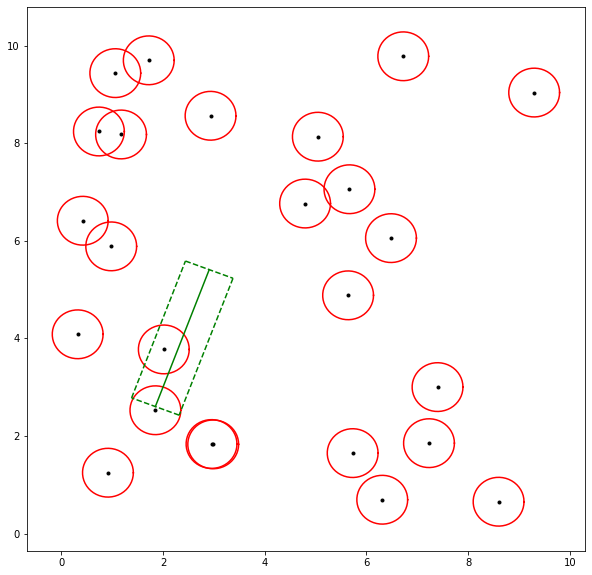

In [153]:
# circle cents
x,y = poisson_points(q, A)

# line angel 
angl = np.random.uniform(0, 2*np.pi)

# line coords
x1,y1 = np.random.uniform(0, A), np.random.uniform(0, A)
x2 = x1 + dist * np.cos(angl)
y2 = y1 + dist * np.sin(angl)

# rect coords 
xA, yA, xB, yB, xC, yC, xD, yD = create_rect(x1,y1,x2,y2,angl)

plt.figure(figsize=(10,10))

# plot circles
plt.plot(x,y,".k")
for i in range(len(x)):
    plot_circle(x[i], y[i], cir_r)

# plot line
plt.plot([x1,x2], [y1,y2], "-g")

# plot rect
plt.plot([xA, xB], [yA, yB], "--g")
plt.plot([xB, xC], [yB, yC], "--g")
plt.plot([xC, xD], [yC, yD], "--g")
plt.plot([xD, xA], [yD, yA], "--g")

Проверка на перекрытие

In [154]:
if iscrossing():
    print("Blocked")
else:
    print("Free")

Blocked


Подсчет вероятности перекрытия на основе 1000 экземпляров

In [139]:
cnt = 0
for i in range(1000):
    # circle cents
    x,y = poisson_points(q, A)

    # line angel 
    angl = np.random.uniform(0, 2*np.pi)

    # line coords
    x1,y1 = np.random.uniform(0, A), np.random.uniform(0, A)
    x2 = x1 + dist * np.cos(angl)
    y2 = y1 + dist * np.sin(angl)
    
    if iscrossing():
        cnt += 1
print(cnt/1000)

0.587


Теоритетическая вероятность 

In [140]:
S = 2 * cir_r * dist
l = q * S
prob = 1 - np.exp(-l)
print(prob)

0.5934303402594008
